In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2025-01-21 06:05:38.058798: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 데이터 로드 & 전처리

In [3]:
# CSV 파일 경로
fer2013_path = '/data/face1/fer/fer2013/fer2013.csv'

# CSV 파일 읽기
data = pd.read_csv(fer2013_path)

# 데이터 확인
print(data.head())  # 상위 5개 행 출력
print(data.info())  # 데이터 정보 출력

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None


In [4]:
# 감정 라벨 정의
emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# emotion 값별 데이터 개수 세기
emotion_counts = data['emotion'].value_counts().sort_index()  # 감정별 데이터 개수
emotion_counts.index = emotion_counts.index.map(emotion_labels)  # 숫자 라벨을 감정 이름으로 매핑

# 출력
print("감정별 데이터 개수")
print(emotion_counts)

감정별 데이터 개수
emotion
Angry       4953
Disgust      547
Fear        5121
Happy       8989
Sad         6077
Surprise    4002
Neutral     6198
Name: count, dtype: int64


In [5]:
# pixels 데이터를 숫자 배열로 변환
data['pixels'] = data['pixels'].apply(lambda x: np.array(x.split(), dtype='float32'))

# X: 이미지 데이터, y: 감정 라벨
X = np.stack(data['pixels'].values)  # 이미지 데이터를 배열로 변환
y = data['emotion']

In [6]:
# 원본 데이터 크기
original_data_size = len(X)

# SMOTE로 생성된 데이터의 시작 인덱스
generated_data_start = original_data_size

In [7]:
# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [8]:
print("Before SMOTE:", np.bincount(y))
print("After SMOTE:", np.bincount(y_resampled))

Before SMOTE: [4953  547 5121 8989 6077 4002 6198]
After SMOTE: [8989 8989 8989 8989 8989 8989 8989]


In [9]:
X_resampled = X_resampled.reshape(-1, 48, 48)

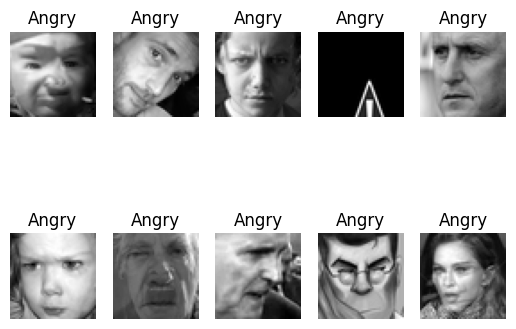

In [11]:
# SMOTE로 생성된 데이터만 시각화
for i in range(10):  # 처음 10개의 생성된 데이터 확인
    plt.subplot(2, 5, i + 1)  # 2행 5열로 배치
    plt.imshow(X_resampled[generated_data_start + i].reshape(48, 48), cmap='gray')  # 생성된 데이터
    plt.title(f"{emotion_labels[y_resampled[generated_data_start + i]]}")
    plt.axis('off')

plt.show()

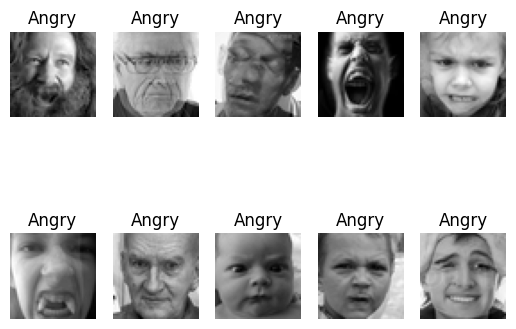

In [12]:
# SMOTE로 생성된 데이터만 시각화
for i in range(10):  # 처음 10개의 생성된 데이터 확인
    plt.subplot(2, 5, i + 1)  # 2행 5열로 배치
    plt.imshow(X_resampled[generated_data_start + i + 1000].reshape(48, 48), cmap='gray')  # 생성된 데이터
    plt.title(f"{emotion_labels[y_resampled[generated_data_start + i + 1000]]}")
    plt.axis('off')

plt.show()

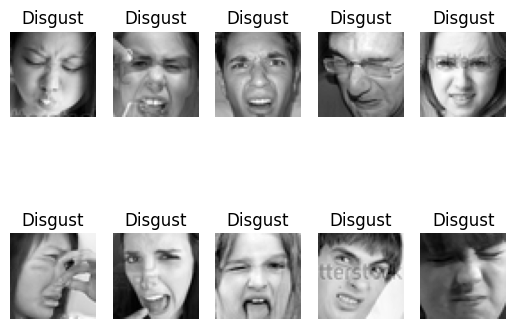

In [14]:
# SMOTE로 생성된 데이터만 시각화
for i in range(10):  # 처음 10개의 생성된 데이터 확인
    plt.subplot(2, 5, i + 1)  # 2행 5열로 배치
    plt.imshow(X_resampled[generated_data_start + i + 6000].reshape(48, 48), cmap='gray')  # 생성된 데이터
    plt.title(f"{emotion_labels[y_resampled[generated_data_start + i + 6000]]}")
    plt.axis('off')

plt.show()

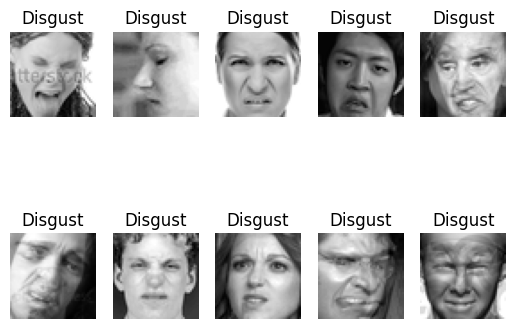

In [15]:
# SMOTE로 생성된 데이터만 시각화
for i in range(10):  # 처음 10개의 생성된 데이터 확인
    plt.subplot(2, 5, i + 1)  # 2행 5열로 배치
    plt.imshow(X_resampled[generated_data_start + i + 12000].reshape(48, 48), cmap='gray')  # 생성된 데이터
    plt.title(f"{emotion_labels[y_resampled[generated_data_start + i + 12000]]}")
    plt.axis('off')

plt.show()

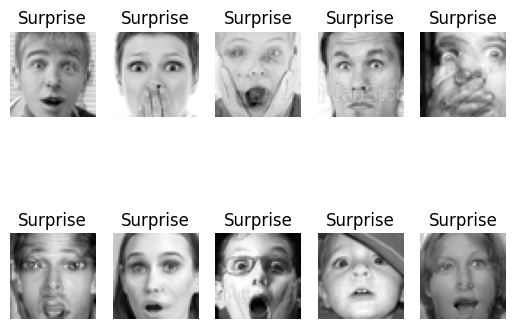

In [16]:
# SMOTE로 생성된 데이터만 시각화
for i in range(10):  # 처음 10개의 생성된 데이터 확인
    plt.subplot(2, 5, i + 1)  # 2행 5열로 배치
    plt.imshow(X_resampled[generated_data_start + i + 20000].reshape(48, 48), cmap='gray')  # 생성된 데이터
    plt.title(f"{emotion_labels[y_resampled[generated_data_start + i + 20000]]}")
    plt.axis('off')

plt.show()